# Final Project Template
This notebook is a template that we can be used as a template for data analysis. 

## Dataset Description
Include information like : 
    - Where we got it
    - Why the source is reliable
    - How it was gathered (study info, participants, etc.)
    - What each column contains and any applicable measurment units

where did I  get it?
url: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

I feel the source is reliable because

#1. It is on UCI. I assume and beleive that a reputable institution like UCI will have its own internal checks 
and processes to ensure the data sources are reliable  

2.  The author and donor of the data is a professor 
Original Owner and Donor 
Prof. I-Cheng Yeh 
Department of Information Management 
and they have shared their contact details as well 
Chung-Hua University, 
Hsin Chu, Taiwan 30067, R.O.C. 
e-mail:icyeh '@' chu.edu.tw 
TEL:886-3-5186511 

3. It has been referenced in many papers like 
Relevant Papers:
Main 
1. I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998). 

Others 
2. I-Cheng Yeh, "Modeling Concrete Strength with Augment-Neuron Networks," J. of Materials in Civil Engineering, ASCE, Vol. 10, No. 4, pp. 263-268 (1998). 
3. I-Cheng Yeh, "Design of High Performance Concrete Mixture Using Neural Networks," J. of Computing in Civil Engineering, ASCE, Vol. 13, No. 1, pp. 36-42 (1999). 
4. I-Cheng Yeh, "Prediction of Strength of Fly Ash and Slag Concrete By The Use of Artificial Neural Networks," Journal of the Chinese Institute of Civil and Hydraulic Engineering, Vol. 15, No. 4, pp. 659-663 (2003). 
5. I-Cheng Yeh, "A mix Proportioning Methodology for Fly Ash and Slag Concrete Using Artificial Neural Networks," Chung Hua Journal of Science and Engineering, Vol. 1, No. 1, pp. 77-84 (2003). 
6. Yeh, I-Cheng, "Analysis of strength of concrete using design of experiments and neural networks," Journal of Materials in Civil Engineering, ASCE, Vol.18, No.4, pp.597-604 (2006). 

The information contained in the datasets are as such: 
1. Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable 
2. Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable 
3. Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable 
4. Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable 
5. Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable 
6. Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable 
7. Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable 
8. Age -- quantitative -- Day (1~365) -- Input Variable 
9. Concrete compressive strength -- quantitative -- MPa -- Output Variable

## Read in and Clean Dataset
Read in your dataset and do all of the necessary transformations and munging including: 
    - Parsing column headers
    - Finding and handling null values
    - Encoding categorical variables
    - Dropping unnecessary columns
    - Binning any large range categorical variables

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls")
#df = pd.read_excel ("E:\3Personal_Study\Colab\Concrete_Data.xls") 
## If we place it on the local machine, something similarto this work
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [2]:
#Reading the column names
df.columns
# these are long names, making them simple

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

#### Renaming Columns

###### Approach: Make a list of the new column names. Apply the same to the df.Columns 

In [3]:
df.columns = ['cement','bfslag', 'flyash', 'water', 'superplasticizer', 'coarse_ness','fine_ness','age','compressivestrength']
df.head(3)

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


### Checking for null values

In [4]:
df.isna().sum() ## seems none
## So what happened here is that df.isna() will return  0 if there is no isna() or 1 if any row is having na records
## and then we are doing sum over them

cement                 0
bfslag                 0
flyash                 0
water                  0
superplasticizer       0
coarse_ness            0
fine_ness              0
age                    0
compressivestrength    0
dtype: int64

In [5]:
# checking values inside different columns
df.cement.value_counts() ## please note that df.cement --> dataframe. Column = Cement --also-- > df['cement'] 

362.60    20
425.00    20
251.37    15
310.00    14
446.00    14
331.00    13
250.00    13
475.00    13
349.00    12
387.00    12
236.00    11
165.00    11
213.50    10
500.00    10
190.34    10
194.68    10
380.00    10
339.00    10
540.00     9
212.00     9
491.00     8
350.00     8
277.00     8
153.00     8
359.00     8
313.30     8
424.00     8
296.00     7
525.00     7
375.00     7
          ..
152.60     1
305.00     1
159.80     1
155.60     1
303.60     1
164.60     1
145.40     1
276.40     1
134.70     1
143.80     1
147.80     1
315.00     1
151.80     1
164.20     1
312.90     1
317.90     1
262.00     1
160.20     1
485.00     1
287.30     1
148.50     1
146.50     1
285.00     1
264.50     1
141.90     1
259.90     1
139.90     1
136.40     1
266.20     1
321.30     1
Name: cement, Length: 280, dtype: int64

In [6]:
df['cement'].value_counts()

362.60    20
425.00    20
251.37    15
310.00    14
446.00    14
331.00    13
250.00    13
475.00    13
349.00    12
387.00    12
236.00    11
165.00    11
213.50    10
500.00    10
190.34    10
194.68    10
380.00    10
339.00    10
540.00     9
212.00     9
491.00     8
350.00     8
277.00     8
153.00     8
359.00     8
313.30     8
424.00     8
296.00     7
525.00     7
375.00     7
          ..
152.60     1
305.00     1
159.80     1
155.60     1
303.60     1
164.60     1
145.40     1
276.40     1
134.70     1
143.80     1
147.80     1
315.00     1
151.80     1
164.20     1
312.90     1
317.90     1
262.00     1
160.20     1
485.00     1
287.30     1
148.50     1
146.50     1
285.00     1
264.50     1
141.90     1
259.90     1
139.90     1
136.40     1
266.20     1
321.30     1
Name: cement, Length: 280, dtype: int64

In [7]:
df.cement.describe() ## looks good enough
## This is a quick way to get information about 1 column at a time for the data set

count    1030.000000
mean      281.165631
std       104.507142
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64

In [8]:
df.bfslag.value_counts()

0.00      466
189.00     30
106.30     20
24.00      14
20.00      12
145.00     11
19.00      10
22.00       8
26.00       8
190.00      7
116.00      7
142.50      6
236.00      6
132.40      6
209.40      6
47.50       6
203.50      6
97.10       6
237.50      6
95.00       6
53.80       5
50.05       5
189.20      5
128.50      5
93.80       5
153.00      5
129.90      5
98.05       5
42.08       5
13.61       5
         ... 
169.60      1
237.00      1
166.00      1
243.50      1
119.00      1
97.00       1
117.00      1
99.00       1
119.70      1
174.00      1
112.30      1
105.10      1
144.20      1
210.20      1
170.20      1
137.20      1
91.70       1
116.80      1
166.40      1
17.60       1
239.00      1
139.40      1
139.90      1
161.60      1
132.60      1
175.00      1
161.00      1
110.50      1
186.70      1
164.20      1
Name: bfslag, Length: 187, dtype: int64

##### If we want to do the same for all the columns of the data set, how can we do that?
1. Read all columns
2. get the data_type for the respective columns 
3. iterate through the colums 
4. get the describe() or the value_counts

##### I amnot sure but I think I saw standard function also for such work.

In [9]:
df.columns
for column in df.columns:
    print (str(df[column].dtype))
    if ((str(df[column].dtype) == 'float64') or (str(df[column].dtype) == 'int')) :
        print('Column being examined is : {0}'.format(column))   ## used the .format for string concatenation
        print(df[column].describe())
        print("\n")

float64
Column being examined is : cement
count    1030.000000
mean      281.165631
std       104.507142
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64


float64
Column being examined is : bfslag
count    1030.000000
mean       73.895485
std        86.279104
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: bfslag, dtype: float64


float64
Column being examined is : flyash
count    1030.000000
mean       54.187136
std        63.996469
min         0.000000
25%         0.000000
50%         0.000000
75%       118.270000
max       200.100000
Name: flyash, dtype: float64


float64
Column being examined is : water
count    1030.000000
mean      181.566359
std        21.355567
min       121.750000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64


float64
Column being examined is : sup

In [10]:
## Some scratch work 
str1 = 'tim'
str2 = 'Tim'
str3 = 'Tim'
print(str1==str2)
print(str2==str3)

if (str2==str3):
    print('They match')

False
True
They match


### Encoding categorical variables

1. None of the column here is categorical

However,if there were any column we have to encode, we would have done the following
a. Choose only such column for encoding which have finite and less number of distinct values in it. 
for example: 
Wont choose Name in an employee dataset to encode. 
but can take the deprtment value to encode though. 

b. import pandas 
c. use get_dummies function of pandas

d. pass to this function, the column like dataframe.column, prefix value , prefix seperator values. 
Store the output in a new dataframe say df_oh
df_oh = pd.get_dummies(df.columnname, prefix='prefix', prefix_sep='_')

e. Join the original dataframe and the new dataframe like df_oh using something like 
dfupdated = df.join(df_oh)



### Dropping unnecessary columns 
None without doing further analysis of the data. 
Data analysis done till now, shows that all columns have meaningful records hence won't delete any columns as yet   

### Binning any large range categorical variables
#large range categorical variables are present, let us look at the data range 

In [11]:
df.bfslag.describe() # range of values 0 to 360 mean value 74. 

count    1030.000000
mean       73.895485
std        86.279104
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: bfslag, dtype: float64

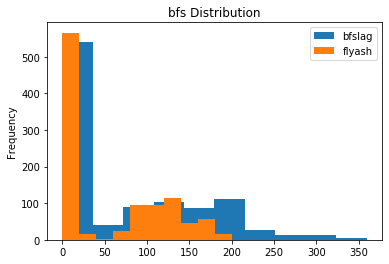

In [12]:
%matplotlib inline    
## matplotlib is used a lot for plotting 

## we pass the columnname(s) and then we pass the paramaetrs of the type of distribution 

df.bfslag.plot(kind='hist', title='bfs Distribution',legend = 'true' ) 
df.flyash.plot(kind='hist', title='bfs Distribution',legend = 'true' )

## Question: What will happen if a column name is not given? and say kind = 'line'

The different values supported by the kind parameter are 
kind : str
 |          - 'line' : line plot (default)
 |          - 'bar' : vertical bar plot
 |          - 'barh' : horizontal bar plot
 |          - 'hist' : histogram
 |          - 'box' : boxplot
 |          - 'kde' : Kernel Density Estimation plot
 |          - 'density' : same as 'kde'
 |          - 'area' : area plot
 |          - 'pie' : pie plot
 
 How did I find that out? Easy and standard way. use the help function as shown below

In [13]:
help(df.bfslag.plot)   ## To get the information on any function, we can use the help function 

Help on SeriesPlotMethods in module pandas.plotting._core object:

class SeriesPlotMethods(BasePlotMethods)
 |  SeriesPlotMethods(data)
 |  
 |  Series plotting accessor and method.
 |  
 |  Examples
 |  --------
 |  >>> s.plot.line()
 |  >>> s.plot.bar()
 |  >>> s.plot.hist()
 |  
 |  Plotting methods can also be accessed by calling the accessor as a method
 |  with the ``kind`` argument:
 |  ``s.plot(kind='line')`` is equivalent to ``s.plot.line()``
 |  
 |  Method resolution order:
 |      SeriesPlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, l

count    1030.000000
mean       54.187136
std        63.996469
min         0.000000
25%         0.000000
50%         0.000000
75%       118.270000
max       200.100000
Name: flyash, dtype: float64


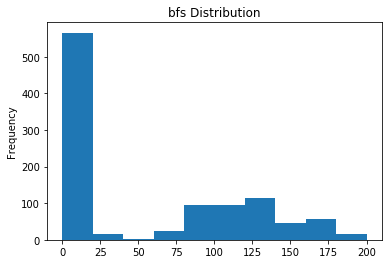

In [14]:
print(df['flyash'].describe() )
df.flyash.plot(kind='hist', title='bfs Distribution')


# Important things to note: does not look like a normal distribution


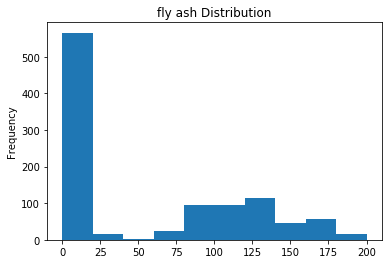

In [15]:
%matplotlib inline
df.flyash.plot(kind='hist', title='fly ash Distribution') 
# range 0 to 200, mean of 54 
# distribution almost sameas bfs, will bin this column as 
#  0 to 50,51-100,101-150,151-200,

In [16]:
df['flyash'].value_counts() 

0.00      566
141.00     16
118.27     15
79.00      14
94.00      13
125.18     10
121.62     10
95.69      10
98.75      10
174.24     10
100.52     10
113.00      8
132.00      8
123.00      8
107.00      7
117.54      5
96.18       5
24.46       5
167.00      5
100.37      5
123.78      5
159.90      5
132.10      5
128.62      5
124.13      5
118.31      5
118.16      5
99.94       5
24.52       5
24.51       5
         ... 
86.10       1
111.20      1
112.60      1
89.60       1
100.40      1
93.90       1
127.90      1
119.80      1
71.50       1
91.70       1
132.60      1
150.40      1
126.50      1
139.00      1
137.00      1
133.00      1
187.00      1
86.50       1
107.50      1
179.00      1
175.00      1
142.70      1
163.00      1
112.30      1
106.70      1
148.10      1
200.10      1
133.60      1
178.90      1
160.90      1
Name: flyash, Length: 163, dtype: int64

In [17]:
df['water'].describe() # range of 121 to 247, mean of 181

count    1030.000000
mean      181.566359
std        21.355567
min       121.750000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64

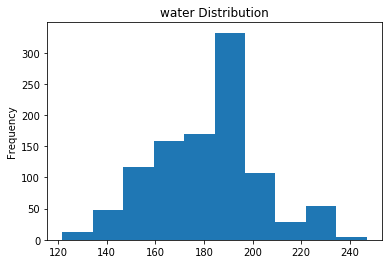

In [18]:
%matplotlib inline
df.water.plot(kind='hist', title='water Distribution')  # this is evenly distributed. can bin this column as well 

In [19]:
df['superplasticizer'].describe() # arange of o to 32 mean of 6.2

count    1030.000000
mean        6.203112
std         5.973492
min         0.000000
25%         0.000000
50%         6.350000
75%        10.160000
max        32.200000
Name: superplasticizer, dtype: float64

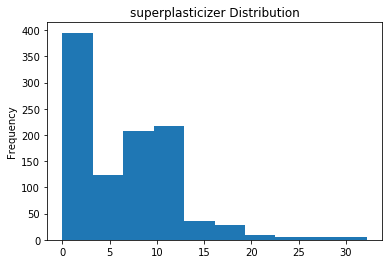

In [20]:
%matplotlib inline
df.superplasticizer.plot(kind='hist', title='superplasticizer Distribution')

## does not look to be distrbuted along the mean

In [21]:
%matplotlib inline
#df.superplasticizer.plot(kind='scatter', title='superplasticizer Distribution')

In [22]:
df['coarse_ness'].describe() # range of values: 801 to 1145, mean of 973

count    1030.000000
mean      972.918592
std        77.753818
min       801.000000
25%       932.000000
50%       968.000000
75%      1029.400000
max      1145.000000
Name: coarse_ness, dtype: float64

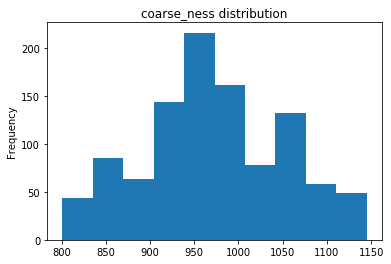

In [23]:
%matplotlib inline
df.coarse_ness.plot(kind='hist', title = 'coarse_ness distribution')

In [24]:
df['fine_ness'].describe() # range of 594 to 993, mean of 774.

count    1030.000000
mean      773.578883
std        80.175427
min       594.000000
25%       730.950000
50%       779.510000
75%       824.000000
max       992.600000
Name: fine_ness, dtype: float64

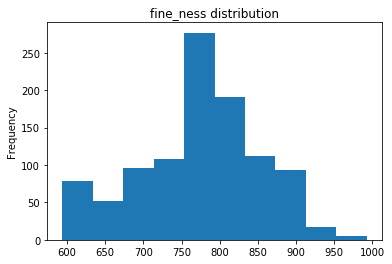

In [25]:
%matplotlib inline
df.fine_ness.plot(kind='hist', title = 'fine_ness distribution')

In [26]:
df['age'].describe() # value of 1 to 365 mean of 45. Plan to bin this column on monthly basis, after looking at all data

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64

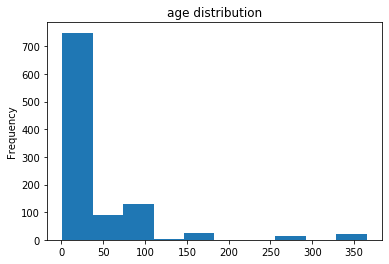

In [27]:
%matplotlib inline
df.age.plot(kind='hist', title = 'age distribution')

In [28]:
df.age.value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

In [29]:
# taking backup before binning
df_bk1 = df

#### So what is binning?
basically dividing a continous / discrete numerical columns into different groups

#### How do we do it?
1. Create ***data_ranges***. Create 1 more range than than the number of buckets / bins you have to create
2. Give name or ***labels*** to the ranges, i.e. names to the data buckets / bins
3. take the column on which it has to be applied and use the  ***pd.cut*** function
4. to the pd.cut function we will pass the column, bins and the labels as shown below


In [30]:
#Doing the actual binning 

water_ranges = [120,150,180,210,250] 
water_labels = ['lower','low','medium','high'] 
df['water_bins'] = pd.cut(df['water'],bins = water_ranges,labels =water_labels)
df.head(5)

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength,water_bins
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,low
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,low
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,high
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,high
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,medium


In [31]:
# Checking for any missed row in binning
df.isna().sum() # seems one record is missed, examining it 

cement                 0
bfslag                 0
flyash                 0
water                  0
superplasticizer       0
coarse_ness            0
fine_ness              0
age                    0
compressivestrength    0
water_bins             0
dtype: int64

In [32]:
fine_ness_ranges = [550,700,800,900,1000] 
fine_ness_labels = ['low','average','high','veryfine'] 
df['fine_ness_bins'] = pd.cut(df['fine_ness'],bins = fine_ness_ranges,labels =fine_ness_labels)
df.isna().sum()

cement                 0
bfslag                 0
flyash                 0
water                  0
superplasticizer       0
coarse_ness            0
fine_ness              0
age                    0
compressivestrength    0
water_bins             0
fine_ness_bins         0
dtype: int64

#### Now will bin the age column as per months

In [33]:
age_ranges = [-1,7,14,28,60,91,120,180, 270, 366 ] # approx 30.5 days in a month
age_labels = ['1-1W','2-2W','3-1M','4-2M','5-3M','6-4M','7-6M','8-9M','9-12M'] 
df['age_bins'] = pd.cut(df['age'],bins = age_ranges,labels =age_labels)
df.head(5)

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength,water_bins,fine_ness_bins,age_bins
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,low,low,3-1M
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,low,low,3-1M
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,high,low,8-9M
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,high,low,9-12M
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,medium,high,9-12M


In [34]:
#Validating no row left behind
df.isna().sum() # looks good

cement                 0
bfslag                 0
flyash                 0
water                  0
superplasticizer       0
coarse_ness            0
fine_ness              0
age                    0
compressivestrength    0
water_bins             0
fine_ness_bins         0
age_bins               0
dtype: int64

In [35]:
# taking backup after these changes before moving to next section
df_bk2 = df

## Exploratory Data Analysis 
Once we've cleaned your dataset, now we can examine your dataset using the steps we outlined in the EDA section of class, including: 
- Examing the distribution of features
- Feature normalization and scaling
- Examining and plotting correlation between variables
- Detecting and Handling outliers

#### Examing the distribution of features

This was done to some extent in the preceeding section already. 

Importing the needed libraries to scale the data

In [36]:
from sklearn import preprocessing 
minmax_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()


##### So what was done in the prervious step? why was minmax_scaler and standard_scaler imported?
The reason is to do the scaling. 
And what is scaling? describing 1 value in terms of some other values. 

In standard scaler, we will describe a value as deviation from  mean divided by population standard deviation 

In [37]:
# Take a subset of columns. Keeping only numerical columns
df_eda = df[['cement',
'bfslag',
'flyash',
'water',
'superplasticizer',
'coarse_ness',
'fine_ness',
'age',
'compressivestrength']]

In [38]:
df_eda.head(10)

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [39]:
df_eda["age"] = df.age.astype(float) # only age is not in float format, type casting it

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_eda.head(10)

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0,39.289790


In [41]:
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_eda))
df_minmax.head(10) # headers have got lost.

,0,1,2,3,4,5,6,7,8
0,1.000000,0.000000,0.0,0.321357,0.07764,0.694767,0.205720,0.074176,0.967445
1,1.000000,0.000000,0.0,0.321357,0.07764,0.738372,0.205720,0.074176,0.741964
2,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,0.739011,0.472642
3,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,0.482400
4,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.986264,0.522806
5,0.374429,0.317195,0.0,0.848303,0.00000,0.380814,0.190667,0.244505,0.556864
6,0.634703,0.264329,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,0.515358
7,0.634703,0.264329,0.0,0.848303,0.00000,0.380814,0.000000,0.074176,0.425029
8,0.374429,0.317195,0.0,0.848303,0.00000,0.380814,0.190667,0.074176,0.542219
9,0.851598,0.000000,0.0,0.848303,0.00000,0.380814,0.000000,0.074176,0.460436


In [42]:
df_minmax.columns = df_eda.columns
df_minmax.head()

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
0,1.000000,0.000000,0.0,0.321357,0.07764,0.694767,0.205720,0.074176,0.967445
1,1.000000,0.000000,0.0,0.321357,0.07764,0.738372,0.205720,0.074176,0.741964
2,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,0.739011,0.472642
3,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,0.482400
4,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.986264,0.522806


In [43]:
df_std = pd.DataFrame(standard_scaler.fit_transform(df_eda))
df_std.head(10) # headers have got lost.

,0,1,2,3,4,5,6,7,8
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753
5,-0.145186,0.465049,-0.847132,2.175367,-1.038944,-0.526514,-1.292531,0.702224,0.671476
6,0.946178,0.244726,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.471953
7,0.946178,0.244726,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.279733,0.037726
8,-0.145186,0.465049,-0.847132,2.175367,-1.038944,-0.526514,-1.292531,-0.279733,0.601073
9,1.855649,-0.856886,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.279733,0.207932


In [44]:
df_std.columns = df_eda.columns  # adding headers and checking
df_std.head(10)

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753
5,-0.145186,0.465049,-0.847132,2.175367,-1.038944,-0.526514,-1.292531,0.702224,0.671476
6,0.946178,0.244726,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.471953
7,0.946178,0.244726,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.279733,0.037726
8,-0.145186,0.465049,-0.847132,2.175367,-1.038944,-0.526514,-1.292531,-0.279733,0.601073
9,1.855649,-0.856886,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.279733,0.207932


##### Examining the distributions

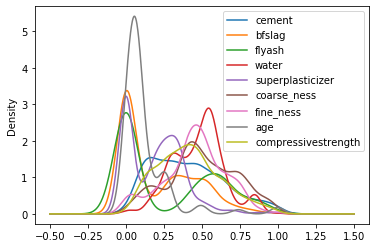

In [45]:
df_minmax.plot(kind='density')

##### Some of these distributions seems to have multiple peaks and not a smooth distributions
Splitting the above plot into smaller groups

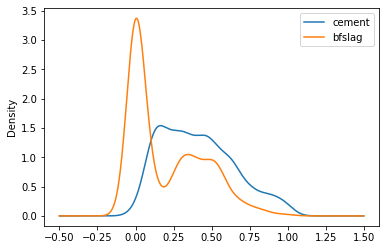

In [46]:
df_minmax[['cement','bfslag']].plot(kind='density')

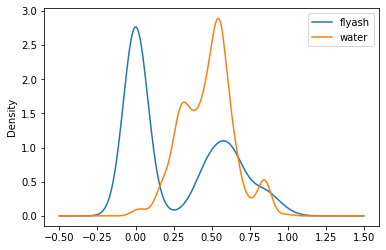

In [47]:
df_minmax[['flyash','water']].plot(kind='density')
## flayash seems to have a bimodal distribution 
## distribution of water seems to be relatively uniformly distributed

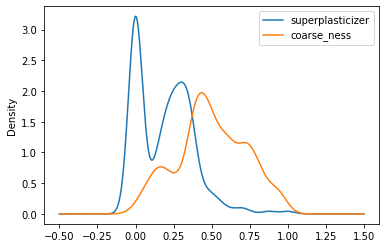

In [48]:
df_minmax[['superplasticizer','coarse_ness',]].plot(kind='density')
## distribution of coarse_ness seems to be uniformly spread
## distribution of super*** does not seems to be spread. it is bimodal

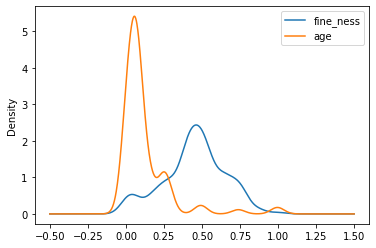

In [49]:
df_minmax[['fine_ness','age']].plot(kind='density')
## distribution of fine_ness seems to be uniformly spread
## distribution of age seems to be uniformly spread

#### Examining the distribution of the normalized dataset

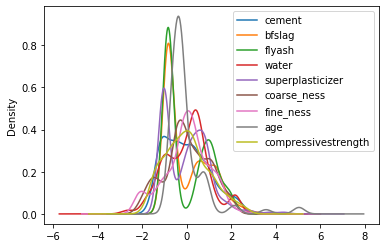

In [50]:
df_std.plot(kind='density')

#### many of the distributions are not centered around mean. which in this case is 0
Splitting the above plot into smaller groups

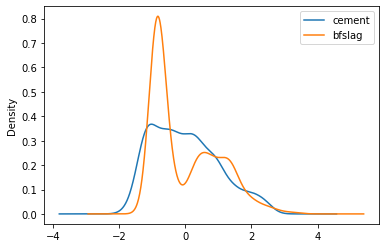

In [51]:
df_std[['cement','bfslag']].plot(kind='density')  ## distribution is not normal

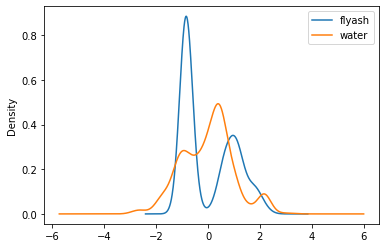

In [52]:
df_std[['flyash','water']].plot(kind='density') ## these 2 distributions are also not normal

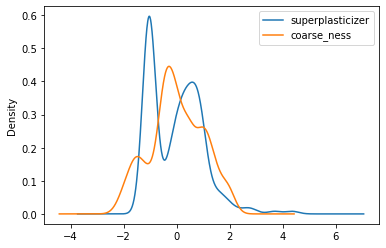

In [53]:
df_std[['superplasticizer','coarse_ness']].plot(kind='density') 
## superplasticizer also do not look normal - not distributed about mean , 
## coarse_ness still has its distribution about mean

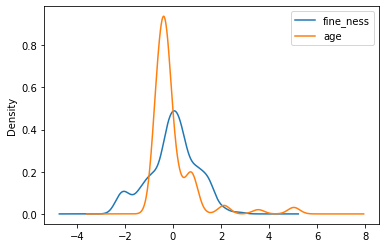

In [54]:
df_std[['fine_ness','age']].plot(kind='density') 
# fine_ness is moreclosely centered around the mean 
# age seems to have multi modal distribution. 

#### Interim conclusion
Water, coarse_ness , fine_ness seem to be the most closely following normal distribution
distribution of the data for these features came as clsoe to bell curve  under min_max distribution as well.

#### Examining and plotting correlation between variables

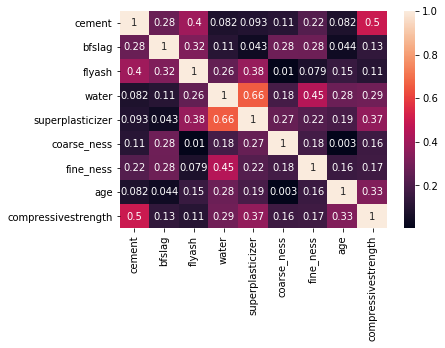

In [55]:
# For correlation we will have to import seaborn
import seaborn as sns
df_corr = abs(df_eda.corr()) ## deliberatley forcing the data to be in positive range. that is easy for me to read
sns.heatmap(df_corr, annot = True)

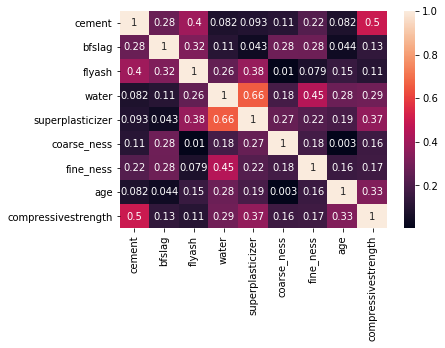

In [56]:
import seaborn as sns
df_corr = abs(df_eda.corr()) ## deliberatley forcing the data to be in absolute range. that is easy for me to read
sns.heatmap(df_corr, annot = True,xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values)

In [57]:
df_eda.corr()

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
bfslag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
flyash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarse_ness,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fine_ness,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
compressivestrength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


###### Inferences from the data of correlation matrix and plots
1. Dependent variable: "compressivestrength" shows highest correlation with cement, superplasticizer, age, water, coarse_ness, fine_ness

2. Independent variables: none of the independent variable have very high corrrelation with each other (except water and super plasticizer max value seen is -0.6) 

In [58]:
df_bk4= df_eda

#### Detecting and Handling outliers

In [59]:
from scipy.stats import stats
df_eda[abs(stats.zscore(df_eda.cement))>2.5] ## no outlier

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength


In [60]:
df_eda[abs(stats.zscore(df_eda.flyash))>2.5] ## no outlier, good

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength


In [61]:
df_eda[abs(stats.zscore(df_eda.coarse_ness))>2.5]

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength


In [62]:
df_eda[abs(stats.zscore(df_eda.fine_ness))>2.5] ## 0 records at 3, 5 at 2.5

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3.0,28.999361
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7.0,45.698469
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28.0,56.695611
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56.0,60.198150
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91.0,62.500999


In [63]:
df_eda[abs(stats.zscore(df_eda.bfslag))>3.0] ## no outlier  ## 12 records @2.5, 4 at 3.0

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7.0,25.422359
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28.0,39.435269
571,228.0,342.1,0.0,185.7,0.0,955.8,674.3,28.0,39.699339
584,228.0,342.1,0.0,185.7,0.0,955.8,674.3,7.0,21.917063


In [64]:
df_eda[stats.zscore(abs(df_eda.superplasticizer))>3.0] ## 22 records at 2.5 score and 10 records at >3.0 scrore

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3.0,40.196451
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3.0,41.299612
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7.0,54.896079
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7.0,46.898158
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28.0,66.899856
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28.0,56.399137
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56.0,69.299233
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56.0,58.798513
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91.0,70.698869
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91.0,59.198409


In [65]:
df_eda[abs(stats.zscore(df_eda.bfslag))>3.0] ## 4 records

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7.0,25.422359
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28.0,39.435269
571,228.0,342.1,0.0,185.7,0.0,955.8,674.3,28.0,39.699339
584,228.0,342.1,0.0,185.7,0.0,955.8,674.3,7.0,21.917063


In [66]:
df_eda[abs(stats.zscore(df_eda.water))>3.0] ## 2 records at 2.5 score and 2 records at >3.0 scrore

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28.0,28.627044
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28.0,28.629801


In [67]:
df_eda[abs(stats.zscore(df_eda.age))>3.0] ## 33 records at 2.5 score and at 3.0 as well
#len(df_eda[stats.zscore(df_eda.age)>3.0])

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.296075
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0,43.698299
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270.0,43.012960
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365.0,56.141962
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365.0,52.516697
25,380.0,0.0,0.0,228.0,0.0,932.0,670.0,270.0,53.300632
26,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270.0,41.151375
30,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365.0,55.260122


##### Interim Findings: 
The following columns have outlier values: 
    age, 
    fine_ness,
    superplasticizer,
    water (2 records), 
    bfslag,
    

The following columns have no outliers at threshold of Z score at 3.0 
    coarse_ness,
    flyash,
    cement
    
Outlier values can impact the correlations and heatmap values, so ideally we should eliminate the outliers and then examine the dataset again 

In [68]:
df_eda_sansoutliers = df_eda[stats.zscore(df_eda.superplasticizer)<=3.0]
    ## I am not sure to tackle the outliers of age since nearly 3% of records will get lost 
    ## superplasticizer's outlier records are being removed to see distribution and corr is impacted                        

In [69]:
df_eda_sansoutliers.corr()

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
cement,1.000000,-0.276370,-0.390077,-0.043367,0.012421,-0.080118,-0.255143,0.086816,0.488459
bfslag,-0.276370,1.000000,-0.326976,0.106781,0.052650,-0.290857,-0.280068,-0.044654,0.137033
flyash,-0.390077,-0.326976,1.000000,-0.279571,0.449572,-0.023246,0.089732,-0.156280,-0.096735
water,-0.043367,0.106781,-0.279571,1.000000,-0.644940,-0.218849,-0.440030,0.280692,-0.273402
superplasticizer,0.012421,0.052650,0.449572,-0.644940,1.000000,-0.226348,0.195123,-0.204596,0.348638
coarse_ness,-0.080118,-0.290857,-0.023246,-0.218849,-0.226348,1.000000,-0.163843,-0.005175,-0.149254
fine_ness,-0.255143,-0.280068,0.089732,-0.440030,0.195123,-0.163843,1.000000,-0.155871,-0.183677
age,0.086816,-0.044654,-0.156280,0.280692,-0.204596,-0.005175,-0.155871,1.000000,0.331811
compressivestrength,0.488459,0.137033,-0.096735,-0.273402,0.348638,-0.149254,-0.183677,0.331811,1.000000


In [70]:
df_eda.corr() ## if we remove the outlier values, the correlation actually goes down with dependent variable

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
bfslag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
flyash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarse_ness,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fine_ness,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
compressivestrength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [71]:
from sklearn.cluster import DBSCAN

# import DBSCAN model
outlier_detection = DBSCAN()

# fit and predict cluster labels for our column
clusters = outlier_detection.fit_predict(df_eda)
clusters2 = outlier_detection.fit_predict(df_eda_sansoutliers)


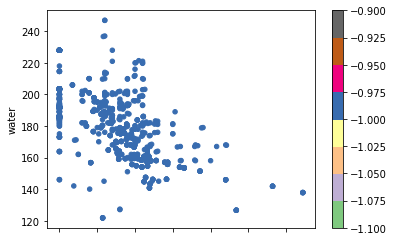

In [72]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
df_eda.plot.scatter(
  x = "superplasticizer",
  y = "water",
  c = clusters,
  cmap = cmap,
  colorbar = True
)

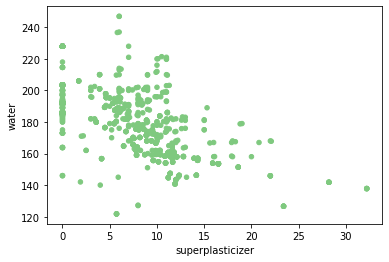

In [73]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
df_eda.plot.scatter(
  x = "superplasticizer",
  y = "water",
  c = clusters,
  cmap = cmap,
  colorbar = False
)

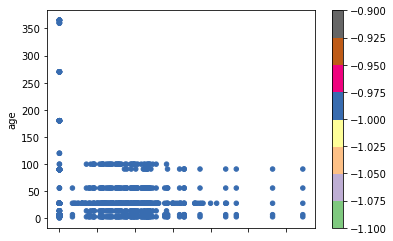

In [74]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
df_eda.plot.scatter(
  x = "superplasticizer",
  y = "age",
  c = clusters,
  cmap = cmap,
  colorbar = True
)

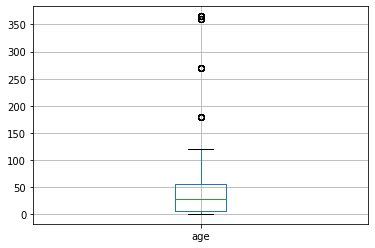

In [75]:
df[['age']].boxplot()

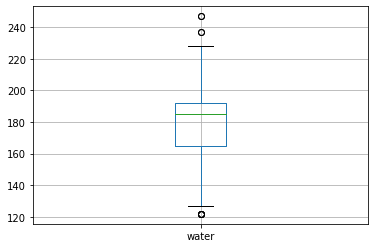

In [76]:
df[['water']].boxplot()

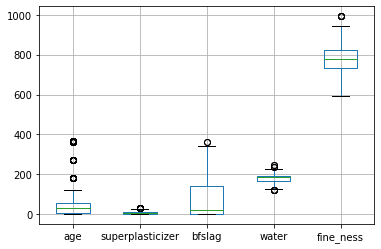

In [77]:
df[['age','superplasticizer','bfslag','water', 'fine_ness']].boxplot()

## Linear Regression (or supplement with another appropriate model as the case may be) 
Once our data is in a roughly normal distribution, we can now setup our model for linear regression. The questions you ask in this section should have been guided by the results of your EDA. 
- Create your model
- Visualize results
- Examine error
- Check and plot residuals. Ideally residuals should have no correlation with any of the dependent variables 

#### Testing Assumption 1: Linear Relationship
We can quickly test for a linear relationship between X and Y using a scatterplot: 
**Dataset being considered** will be done below

#### Testing Assumption 2: Multicollinearity
we should not have high correlation between the independent variables

**Dataset being considered** The independent variables didnot had high correlation with each other. 
the max value seen was 0.45

#### Check after modeling: 
 **Homoscedasticity**: Error is independent and random 

  **Residual**- Measured error terms are normally distributed. This can be assured with enough data points thanks to the Central Limit Theorum

In [78]:
df_eda.corr()
#High correlation with Target: cement, age, superplasticizer

,cement,bfslag,flyash,water,superplasticizer,coarse_ness,fine_ness,age,compressivestrength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
bfslag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
flyash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarse_ness,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fine_ness,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
compressivestrength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


Column \ Test	With Y	With Each Other	Has Outlier values?	Standardized data - smooth distribution?	Is normal distribution?
cement	0.497833	0.4	No	No	
bfslag	0.134824	0.33	Yes	No	
flyash	0.105753	0.4 with Cement	No	No	
water	0.289613	.66 with superplasticizer	Yes	Yes	
superplasticizer	0.366102	.66 with water	Yes		
coarse_ness	0.164928	0	No	Yes	
fine_ness	0.167249	0	No	Yes	
age	0.328877		Yes		
compressivestrength					


##### At this stage dopping the following columns from further analysis:
    - either water OR superplasticizer
    - bfslag
    - flyash
    
##### Keeping the following columns
- cement, 
-  either water or superplasticizer,
-  coarse_ness,
-  fine_ness,
-  age

##### Next 2 tests
1. visualy examine the scatter plots 
2. Check if the data is normally distributed

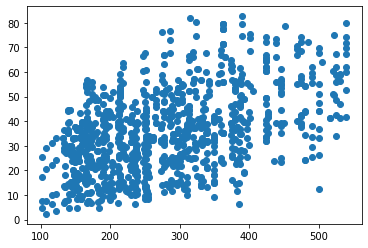

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.cement, df.compressivestrength) ## feels positively increasing

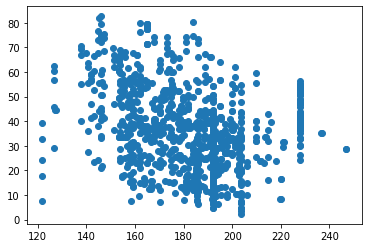

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.water, df.compressivestrength) ##can see a -ve trend

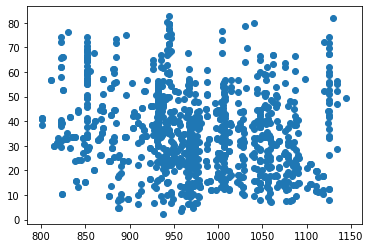

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.coarse_ness, df.compressivestrength) ##cannot see a trend

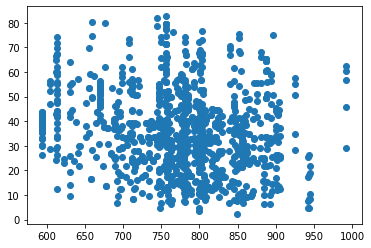

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.fine_ness, df.compressivestrength) ##cannot see a trend

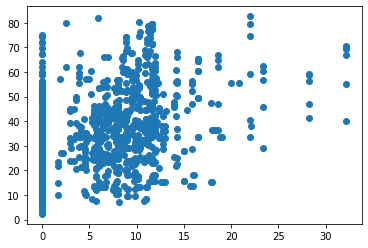

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.superplasticizer, df.compressivestrength) ##can see a trend, but can keep either water / super

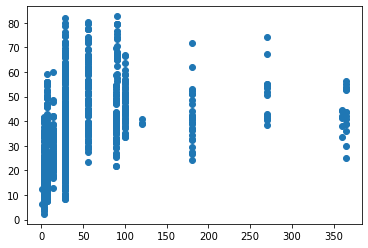

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.age, df.compressivestrength) ##cannot understand / identify  a trend

#### Checking Normal Distribution

In [85]:
#### Checking normal distribution

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda.cement

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n ** BFSLAG ** BEING TESTED")
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))



 ** BFSLAG ** BEING TESTED

 Shapiro Test: W-statistic= 0.9589571356773376, Pvalue= 2.078041149622246e-16
Sample does not look Gaussian (reject H0)

K^2 Stat= 61.766062585264976, Pvalue= 3.869634310956988e-14
Sample does not look Gaussian (reject H0)

Anderson Test Statistic: 10.398819262112283
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


In [86]:
#### Checking normal distribution-- bfslag

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda.bfslag

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n ** BFSLAG ** BEING TESTED")
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))



 ** BFSLAG ** BEING TESTED

 Shapiro Test: W-statistic= 0.8124112486839294, Pvalue= 5.7973629161288525e-33
Sample does not look Gaussian (reject H0)

K^2 Stat= 107.60007301909712, Pvalue= 4.314604754494087e-24
Sample does not look Gaussian (reject H0)

Anderson Test Statistic: 79.4145094000528
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


In [87]:
#### Checking normal distribution -- flyash

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda.flyash

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n ** FLYASH** Being Tested")
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))



 ** FLYASH** Being Tested

 Shapiro Test: W-statistic= 0.7620092034339905, Pvalue= 4.140206041459257e-36
Sample does not look Gaussian (reject H0)

K^2 Stat= 3991.1623477313747, Pvalue= 0.0
Sample does not look Gaussian (reject H0)

Anderson Test Statistic: 114.32440792916509
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


In [88]:
#### Checking normal distribution -- water

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda.water

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n **WATER BEING TESTED**")
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))



 **WATER BEING TESTED**

 Shapiro Test: W-statistic= 0.9803996682167053, Pvalue= 1.474172034443555e-10
Sample does not look Gaussian (reject H0)

K^2 Stat= 1.6632219692527057, Pvalue= 0.4353473831543476
Sample looks Gaussian (fail to reject H0)

Anderson Test Statistic: 7.1360437524026565
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


In [89]:
#### Checking normal distribution -- superplasticizer

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda.superplasticizer

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n SUPERplasticizer BEING TESTED")
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))



 SUPERplasticizer BEING TESTED

 Shapiro Test: W-statistic= 0.8660508394241333, Pvalue= 9.102149547230668e-29
Sample does not look Gaussian (reject H0)

K^2 Stat= 140.50211841863384, Pvalue= 3.0928057032106306e-31
Sample does not look Gaussian (reject H0)

Anderson Test Statistic: 39.67565654850978
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


In [90]:
#### Checking normal distribution --coarse_ness

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda.coarse_ness

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n COARSE_NESS BEING TESTED")
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))



 COARSE_NESS BEING TESTED

 Shapiro Test: W-statistic= 0.9824541211128235, Pvalue= 8.355026115403064e-10
Sample does not look Gaussian (reject H0)

K^2 Stat= 32.569232854609524, Pvalue= 8.466052273892135e-08
Sample does not look Gaussian (reject H0)

Anderson Test Statistic: 4.461279174129231
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


In [91]:
#### Checking normal distribution --fine_ness

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda.fine_ness

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n FINENESS BEING TESTED" )
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))



 FINENESS BEING TESTED

 Shapiro Test: W-statistic= 0.9806743264198303, Pvalue= 1.84647602763377e-10
Sample does not look Gaussian (reject H0)

K^2 Stat= 11.18876693014375, Pvalue= 0.003718691331969558
Sample does not look Gaussian (reject H0)

Anderson Test Statistic: 5.94964641456545
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


In [92]:
#### Checking normal distribution --age

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda.age

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n AGE BEING TESTED" )
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))



 AGE BEING TESTED

 Shapiro Test: W-statistic= 0.5907049179077148, Pvalue= 7.707141553786494e-44
Sample does not look Gaussian (reject H0)

K^2 Stat= 727.478896123572, Pvalue= 1.0714325997785868e-158
Sample does not look Gaussian (reject H0)

Anderson Test Statistic: 128.95489911379832
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


#### Interim Observation
None of the feature possess a normal distribution. 
Seems weird because the distribution of data had looked normal at the start

Wil try to remove the outlier records for someof the features and test the normality for them one more time. 
The features that shall be retested are: water, superplasticizer, age

In [93]:
df_eda_2 = df_eda[stats.zscore(df_eda.water)<3.0] ## OUTLIERS OF WATER BEING REMOVED 
df_eda_2.count() ## 2 rows removed

cement                 1028
bfslag                 1028
flyash                 1028
water                  1028
superplasticizer       1028
coarse_ness            1028
fine_ness              1028
age                    1028
compressivestrength    1028
dtype: int64

In [94]:
#### Checking normal distribution --water -- NOT MUCH DIFFERENCE

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda_2.water

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n WATER BEING TESTED" )
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))



 WATER BEING TESTED

 Shapiro Test: W-statistic= 0.979309618473053, Pvalue= 6.348159498070771e-11
Sample does not look Gaussian (reject H0)

K^2 Stat= 0.4295778421474587, Pvalue= 0.8067117020472265
Sample looks Gaussian (fail to reject H0)

Anderson Test Statistic: 7.134460610376436
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


In [95]:
## Outliers of superplasticizer being removed  
df_eda_3 = df_eda_2[stats.zscore(df_eda_2.superplasticizer)<3.0] 
df_eda_3.count() ## 10 rows removed

cement                 1018
bfslag                 1018
flyash                 1018
water                  1018
superplasticizer       1018
coarse_ness            1018
fine_ness              1018
age                    1018
compressivestrength    1018
dtype: int64

In [96]:
#### Checking normal distribution --superplasticizer -- NOT MUCH DIFFERENCE

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda_3.superplasticizer

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n superplasticizer BEING RE-TESTED AFTRE REMOVING OUTLIERS" )
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))


 superplasticizer BEING RE-TESTED AFTRE REMOVING OUTLIERS

 Shapiro Test: W-statistic= 0.8797640800476074, Pvalue= 2.456517866276086e-27
Sample does not look Gaussian (reject H0)

K^2 Stat= 49.608257862370294, Pvalue= 1.6892879212150683e-11
Sample does not look Gaussian (reject H0)

Anderson Test Statistic: 43.449201484613695
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


In [97]:
## Outliers of BFSLAG being removed  
df_eda_4 = df_eda_3[stats.zscore(df_eda_3.bfslag)<3.0] 
len(df_eda_4) ## 4 records removed

1014

In [98]:
#### Checking normal distribution -- BFSLAG -- NO DIFFERENCE

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda_4.bfslag

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n BFSLAG BEING RE-TESTED AFTRE REMOVING OUTLIERS" )
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))


 BFSLAG BEING RE-TESTED AFTRE REMOVING OUTLIERS

 Shapiro Test: W-statistic= 0.8090499639511108, Pvalue= 5.7221819708701054e-33
Sample does not look Gaussian (reject H0)

K^2 Stat= 137.16620183356548, Pvalue= 1.6395992841353582e-30
Sample does not look Gaussian (reject H0)

Anderson Test Statistic: 80.60432697718193
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


In [99]:
## Outliers of BFSLAG being removed  
df_eda_5 = df_eda_4[stats.zscore(df_eda_4.age)<3.0] 
len(df_eda_5) ## 33 records removed, i.e. nearly 3% of the records removed !

981

In [100]:
#### Checking normal distribution -- AGE -- 3% records removed, Yet normal ditribution  not achieved

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda_5.age

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n AGE BEING RE-TESTED AFTRE REMOVING OUTLIERS" )
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))


 AGE BEING RE-TESTED AFTRE REMOVING OUTLIERS

 Shapiro Test: W-statistic= 0.74687659740448, Pvalue= 3.306330409302118e-36
Sample does not look Gaussian (reject H0)

K^2 Stat= 385.00149840378094, Pvalue= 2.500269708885572e-84
Sample does not look Gaussian (reject H0)

Anderson Test Statistic: 84.47193457657522
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


##### Checking the other 3 features once again after eliminating 3% outlier records 

In [101]:
#### Checking normal distribution --water -- NOT MUCH DIFFERENCE

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda_5.water

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n WATER BEING RE-TESTED" )
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))


 WATER BEING RE-TESTED

 Shapiro Test: W-statistic= 0.9816020131111145, Pvalue= 8.589469691067109e-10
Sample does not look Gaussian (reject H0)

K^2 Stat= 0.8283214368973386, Pvalue= 0.6608947247549648
Sample looks Gaussian (fail to reject H0)

Anderson Test Statistic: 6.512058981672681
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


In [102]:
#### Checking normal distribution --superplasticizer -- NOT MUCH DIFFERENCE

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

df_feature_under_test=  df_eda_5.superplasticizer

### run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_feature_under_test)
print("\n superplasticizer BEING RE-TESTED AFTRE REMOVING OUTLIERS" )
print("\n Shapiro Test: W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


### normality test
k2_stat, p = normaltest(df_feature_under_test)
print('\nK^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')    
    
    
### anderson test
result = anderson(df_feature_under_test)

print('\nAnderson Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))


 superplasticizer BEING RE-TESTED AFTRE REMOVING OUTLIERS

 Shapiro Test: W-statistic= 0.8901441097259521, Pvalue= 7.790696006432635e-26
Sample does not look Gaussian (reject H0)

K^2 Stat= 40.81206710140212, Pvalue= 1.3733215385820968e-09
Sample does not look Gaussian (reject H0)

Anderson Test Statistic: 37.11027849204527
Significance: 15.0 
 Pval cutoff: 0.574 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.653 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.784 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.914 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.088 - Data does not look normal (reject H0)


##### Status:
Unable to find feature that is normally distributed, even after removing outliers. 
Yet, going ahead to build the linear regression model.
Will test the following features (based on correlation matrix, heat map, scatter plots visual test and other test):
cement, water and superplasticizer 

#### Implementing Linear Regression in Sci-Kit Learn

In [103]:
df_x = df[['cement','water','superplasticizer']]
df_x_std = df_std[['cement','water','superplasticizer']]

print(df.head())

df_x.head(5)

   cement  bfslag  flyash  water  superplasticizer  coarse_ness  fine_ness  \
0   540.0     0.0     0.0  162.0               2.5       1040.0      676.0   
1   540.0     0.0     0.0  162.0               2.5       1055.0      676.0   
2   332.5   142.5     0.0  228.0               0.0        932.0      594.0   
3   332.5   142.5     0.0  228.0               0.0        932.0      594.0   
4   198.6   132.4     0.0  192.0               0.0        978.4      825.5   

   age  compressivestrength water_bins fine_ness_bins age_bins  
0   28            79.986111        low            low     3-1M  
1   28            61.887366        low            low     3-1M  
2  270            40.269535       high            low     8-9M  
3  365            41.052780       high            low    9-12M  
4  360            44.296075     medium           high    9-12M  


,cement,water,superplasticizer
0,540.0,162.0,2.5
1,540.0,162.0,2.5
2,332.5,228.0,0.0
3,332.5,228.0,0.0
4,198.6,192.0,0.0


In [104]:
df_x_std.head()

,cement,water,superplasticizer
0,2.477918,-0.916663,-0.620225
1,2.477918,-0.916663,-0.620225
2,0.491443,2.175367,-1.038944
3,0.491443,2.175367,-1.038944
4,-0.790432,0.488805,-1.038944


In [105]:
df_y= df[['compressivestrength']]
df_y_std = df_std[['compressivestrength']]
print(df_y.head())
df_y_std.head()

   compressivestrength
0            79.986111
1            61.887366
2            40.269535
3            41.052780
4            44.296075


,compressivestrength
0,2.645192
1,1.561277
2,0.266608
3,0.313515
4,0.507753


#### Creating features list to pull out one feature at a time

In [106]:
df_cement = df[['cement']]
df_water = df[['water']]
df_superplasticizer = df[['superplasticizer']]

df_cement_std = df_std[['cement']]
df_water_std = df_std[['water']]
df_superplasticizer_std = df_std[['superplasticizer']]

In [107]:
print(df_cement.head(5))
df_cement_std.head(5)

   cement
0   540.0
1   540.0
2   332.5
3   332.5
4   198.6


,cement
0,2.477918
1,2.477918
2,0.491443
3,0.491443
4,-0.790432


In [108]:
print(df_water.head(5))
df_water_std.head(5)

   water
0  162.0
1  162.0
2  228.0
3  228.0
4  192.0


,water
0,-0.916663
1,-0.916663
2,2.175367
3,2.175367
4,0.488805


In [109]:
print(df_superplasticizer.head(5))
df_superplasticizer_std.head(5)

   superplasticizer
0               2.5
1               2.5
2               0.0
3               0.0
4               0.0


,superplasticizer
0,-0.620225
1,-0.620225
2,-1.038944
3,-1.038944
4,-1.038944


#### Split into Training and Test Sets, Instantiating the linear model, Training the model (fit)
We'll use sklearn's train_test_split() function to hold aside a specified percent of our dataset for testing after we finish training the model. 
and we will use the sklearn.linear_model's LinearRegression

In [110]:
df[['cement','compressivestrength']].head(20)
#df.columns

,cement,compressivestrength
0,540.0,79.986111
1,540.0,61.887366
2,332.5,40.269535
3,332.5,41.052780
4,198.6,44.296075
5,266.0,47.029847
6,380.0,43.698299
7,380.0,36.447770
8,266.0,45.854291
9,475.0,39.289790


### Attempt #1  in Training, testing and evaluation of fit : Cement 


In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_cement, df.compressivestrength, 
                                                   test_size=0.25, 
                                                   random_state=42)


In [112]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression(fit_intercept=True,
                        n_jobs=4)

In [113]:
x_train.describe()

,cement
count,772.000000
mean,284.800881
std,107.823351
min,102.000000
25%,194.385000
50%,277.000000
75%,362.600000
max,540.000000


In [114]:
y_train.describe()

count    772.000000
mean      35.895710
std       16.786940
min        2.331808
25%       23.742796
50%       34.222141
75%       45.865322
max       82.599225
Name: compressivestrength, dtype: float64

In [115]:
fit1 = lr1.fit(x_train, y_train)
fit1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [116]:
lr1.coef_

array([0.07720749])

In [117]:
lr1.intercept_

13.906950577136694

In [118]:
coef_df = pd.DataFrame({"feature": "cement", 
                        "coeff": fit1.coef_},
                      index=[0]
                      )
coef_df

,feature,coeff
0,cement,0.077207


Seems there is something incorrect in the modelbeing built by me here. Error has been fixed. It was caused because I had rounded off the coef_df

Put the same data in an excel and did linear regression there and compared the result

![image.png](attachment:image.png)

--The **intercept value in excel and panda's linear regression model almost same.** 

--The **slope value, i.e. coefficent is also similar from  excel and from our model** 

In [119]:
#### Making predictions
preds = lr1.predict(x_test) # checking if our x test values can predict our known y test labels
preds[0:5] # printing first five predictions

array([34.44414168, 41.90238477, 44.01014912, 41.90238477, 25.10203595])

### Calculting MAE, RMSE, R2Square and the plot of predicted vs actual and randomness of erro

In [120]:
## MAE

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, preds)
print("MAE =",MAE, "\tMean Value of Y =",y_test.mean(), "\tAvg of MAE over Y=",MAE/y_test.mean())

MAE = 11.73691995402981 	Mean Value of Y = 35.58481574725418 	Avg of MAE over Y= 0.329829442911629


#### RMSE -1

In [121]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds) # calculate mean squared error
rmse = np.sqrt(mse) # calcualate root mean squared error
rmse   ##Ideally this should be as close to zero as possible

14.233550592184192

#### R2 Score- Coefficient of Determination-1

In [122]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)   ## Ideally this should be as near to 1 as possible

0.25207310283870443

#### Checking randomness of error-1

Text(0, 0.5, 'Residuals')

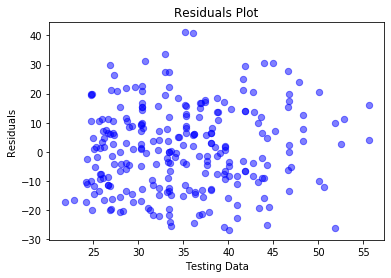

In [123]:
residuals = y_test - preds
plt.scatter(lr1.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals") 

Errors look randomly distributed all over the plot with no trend

Text(0, 0.5, 'Predictions')

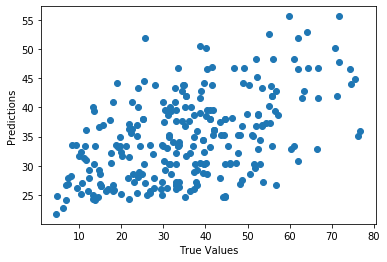

In [124]:
## plot predicted vs actual
plt.scatter(y_test, preds) # plotting our known testing labels against our predictions
plt.xlabel("True Values")
plt.ylabel("Predictions")

### Final Equation
Y = 13.9065 + 0.077207*x (where X = value of feature cement)


### Attempt #2  in Training, testing and evaluation of fit : Cement_std 

In [125]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(df_cement_std, df_y_std, 
                                                   test_size=0.25, 
                                                   random_state=42)

In [126]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression(fit_intercept=True,
                        n_jobs=4)
fit2 = lr2.fit(x_train2, y_train2)
fit2


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [127]:
print( "lr2.intercept_ =",lr2.intercept_,"\t lr2.coef_ =",lr2.coef_,"\tlr2.fit_coef_ =",fit2.coef_,
      "\tlr2.fit_intercept =",lr2.fit_intercept)

lr2.intercept_ = [-0.01214512] 	 lr2.coef_ = [[0.48299345]] 	lr2.fit_coef_ = [[0.48299345]] 	lr2.fit_intercept = True


In [128]:
fit2.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 4, 'normalize': False}

#### Making predictions

In [129]:
preds2 = lr2.predict(x_test2) # checking if our x test values can predict our known y test labels

Text(0, 0.5, 'Predictions')

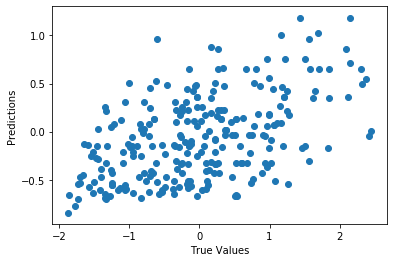

In [130]:
## plot predicted vs actual
plt.scatter(y_test2, preds2) # plotting our known testing labels against our predictions
plt.xlabel("True Values")
plt.ylabel("Predictions")

##### Distribution of predictions is alsmost same before and after standardizing the data and doing regression. 
which is sort of expected

##### Checking Assumption 3: Randomness of Error

Text(0, 0.5, 'Residuals')

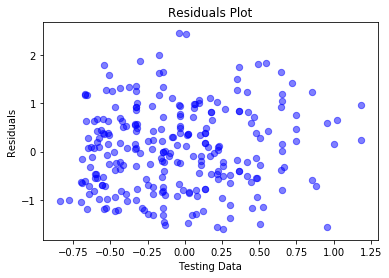

In [131]:
residuals2 = y_test2 - preds2
plt.scatter(lr2.predict(x_test2), residuals2,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [132]:
residuals2.describe()

,compressivestrength
count,258.000000
mean,0.048486
std,0.852707
min,-1.608386
25%,-0.628192
50%,0.054864
75%,0.649978
max,2.461218


**Residual / error are same randomly ditributed as they were before standardizing the data**

#### Calculating MAE, RMSE, R2Squre

In [133]:
## MAE

from sklearn.metrics import mean_absolute_error
MAE2 = mean_absolute_error(y_test2, preds2)
print("MAE2 =",MAE2, "\tMean Value of Y =",y_test2['compressivestrength'].mean(), "\nAvg of MAE2 over Y=",MAE2/y_test2.mean())

MAE2 = 0.7029119568932506 	Mean Value of Y = -0.013955330722883316 
Avg of MAE2 over Y= compressivestrength   -50.368706
dtype: float64


#### The MAE have increased after standardizing !

In [134]:
## RMSE
from sklearn.metrics import mean_squared_error
MSE2 = mean_squared_error(y_test2, preds2)
RMSE2 = np.sqrt(MSE2)
RMSE2

0.8524325751115083

In [135]:
##### RMSE2 < RMSE1 which is plausible since the data has been scaled down

In [136]:
## R2 Square
from sklearn.metrics import r2_score
r2_score(y_test2, preds2)

0.25207310283870443

###### R2Square model 2 =  R2Square model 1 
Which is also on expected line and indicated that in this case scaling of data did not improve the effectiveness of the regression model

##### Was planning to do the regression analysis of the remaining 2 variables and their standardized value. 
However based on the above observation, do not feel that standardizing data helps improve the regression model. 


### Trying multivariable linear regression to cehck if the predictability change.
Attempt 1: factors: cement, water and age
Attempt 2: factors: cement, superplasticizer and age    

Text(0, 0.5, 'Predictions')

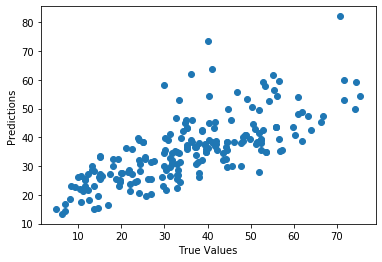

In [137]:
df_x21 = df[['cement','superplasticizer','age']]
df_y21 = df['compressivestrength']


from sklearn.linear_model import LinearRegression

x_train21, x_test21, y_train21, y_test21 = train_test_split(df_x21, df_y21, test_size=0.2, random_state=42)
lr21 = LinearRegression()
fit21 = lr21.fit(df_x21, df_y21)

preds21 = lr21.predict(x_test21)
plt.scatter(y_test21, preds21)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

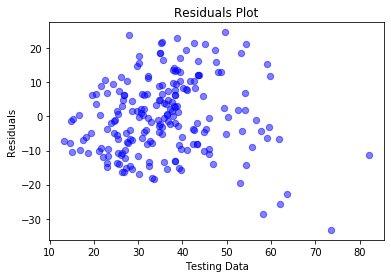

In [138]:
#residuals plot
residuals21 = y_test21 - preds21 
plt.scatter(preds21, residuals21, c='b', s=40, alpha=0.5) 
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

**Distribution of errors looks random.** 
**-Checking this visual observation by looking at mean and standard deviation of the residuals**

In [139]:
residuals21.describe() ## errors have mean of -0.22 which can be accepted. if the sample increases, this should lean to 0

count    206.000000
mean      -0.129360
std       10.966127
min      -33.273877
25%       -7.945076
50%       -0.552295
75%        7.493985
max       24.682695
Name: compressivestrength, dtype: float64

In [140]:
from sklearn.metrics import mean_absolute_error
MAE21 = mean_absolute_error(y_test21, preds21)
print("MAE21 =",MAE21)# "\nAvg of MAE2 over Y=",MAE21/y_test21.mean())
print("Mean Y test =",y_test21.mean())
print ("mean error / average value =" , (MAE21/y_test21.mean()))

MAE21 = 8.916875754948014
Mean Y test = 35.65830685839863
mean error / average value = 0.25006447418710837


In [141]:
from sklearn.metrics import mean_squared_error
mse21 = mean_squared_error(y_test21, preds21)
rmse21 = np.sqrt(mse)
rmse21

14.233550592184192

In [142]:
## R2 Square
from sklearn.metrics import r2_score
r2_score21 = r2_score(y_test21, preds21) 
r2_score21
## this value should be as close to 1 as possible. On taking 3 input parameters, the r2_score jumps from ~0.25 to 0.50 
## which means models can predict with more accuracy. 
## However it is still far less than the desired levels which would be as close to 1  as possible.

0.5355153222613767

### Trying multivariable linear regression to cehck if the predictability change.
**Attempt 2:** factors: cement, water and age Attempt 2: factors: cement, water and age

In [143]:
df_x22 = df[['cement','water','age']] 
## why these variable? They had high corr() with Y. 
## watre and superplasticizer have not been taken together

df_y22 = df['compressivestrength']

from sklearn.linear_model import LinearRegression

x_train22, x_test22, y_train22, y_test22 = train_test_split(df_x22, df_y22, test_size=0.2, random_state=42)
lr22 = LinearRegression()
fit22 = lr22.fit(df_x22, df_y22)
preds22 = lr22.predict(x_test22)
residuals22 = y_test22 - preds22 

Text(0, 0.5, 'Residuals')

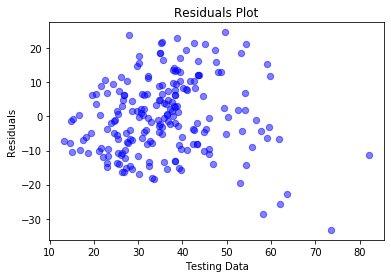

In [144]:
plt.scatter(preds21, residuals21, c='b', s=40, alpha=0.5) 
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

**residuals look randomly distributed**

**to validate looking at the description of residual22**

In [145]:
residuals22.describe()  ## value should have been 0 for mean. It is -0.23, which seems ok. 

count    206.000000
mean      -0.227115
std       11.331157
min      -32.745343
25%       -9.146714
50%       -0.534450
75%        7.875236
max       25.066139
Name: compressivestrength, dtype: float64

In [146]:
from sklearn.metrics import mean_absolute_error
MAE22 = mean_absolute_error(y_test22, preds22)
print("MAE22 =",MAE22)# "\nAvg of MAE2 over Y=",MAE21/y_test21.mean())
print("Mean Y test =",y_test22.mean())
print ("mean error / average value =" , (MAE22/y_test22.mean()))

from sklearn.metrics import mean_squared_error
mse22 = mean_squared_error(y_test22, preds22)
rmse22 = np.sqrt(mse)
print("rmse22=",rmse22) 

## R2 Square
from sklearn.metrics import r2_score
r2_score22 = r2_score(y_test22, preds22) 
print("r2_score22 =",r2_score22)

MAE22 = 9.375073568610231
Mean Y test = 35.65830685839863
mean error / average value = 0.26291415365960125
rmse22= 14.233550592184192
r2_score22 = 0.5039471692031243


## Conclusion
In this final section, you should draw conclusions based on your analysis. Each of your conclusion should be supported with visualizations and pvalues and any other appropriate measurments for your dataset. 

While doing the analysis, I had started to draw conclusion and have already noted them based on the data I was seeing. 
I will try to consolidate all the findings here to summarize. 

Analysis of the data seen and steps taken
None of the features had null values, so no null handling was needed. None of the features has values which needed to be corrected. The data set does not had any categorical column in it. 

During the normalization and scaling the trend of the data indicated that none of the features had a very smooth gaussian distribution. This fast was also re-enforced when standard scaling was done, and the features were checked for having normal distribution. None of the feature had gaussian distribution, except for water which passed 1 of the 3 tests

**Outliers:** Of the 8 features, 3 features did not had outliers at absolute Z score more than 2.5: cement, flayash, coarse_ness. 
Remaining 5 features had some outlier records: fine_ness, bfslag, superplasticizer,water, age had outliers.

**Correlation amongst features, multicollenarity:** Amongst the 8 variables, only water and superplasticizer showed high level of correlation amongst them (-.66). This looked like a lot to me, hence in the subsequent steps of analysis, I kept either of these variables and not both.  Remaining 6 features did not have high correlation with each other.
When outlier records were removed and normality was tested again, the features still did not had gaussian distribution

**Correlation with dependent variable:** Highest absolute correlation was seen for Cement, age, superplasticizer.

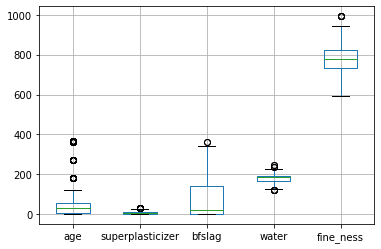

In [147]:
df[['age','superplasticizer','bfslag','water', 'fine_ness']].boxplot()

For calaculating the p values for the different features, the following 3 tests were performed
1.     Anderson Darling test, 
2.     K^2 Test and 
3.     Shapiro test. 

The features had shown the following p values (all values are calculated above, Shapiro test value being shown here):

1. cement: p value = 2.078041149622246e-16

2. bfslag: p value = 5.7973629161288525e-33

3. flayash: p value = 4.140206041459257e-36

4. water: p value = 1.474172034443555e-10

5. SUPERplasticizer: p value = 9.102149547230668e-29 

6. coarse_ness: p value = 8.355026115403064e-10

7. fine_ness: p value = 1.84647602763377e-10

8. age: p value = 7.707141553786494e-44

##### Regression Equation: feature cement
**Y = 13.9065 + 0.077207*x (where X = value of feature cement)**

for this feature, value of MAE (mean average error, RMSE (room mean squared error) and R^2Score are 
MAE = 11.7369, RMSE = 14.2335 and R^2 score = 0.25207

R^2 score should be near to 1 in ideal case and RMSE should ideally be near to 0. 

We see none of these requirements met, hence this feature alone is not very reliable feature to predict the dependent variable compressivestrength of Cement 

Good thing was error values were almost randomly distributed.

**Reason for selecting the feature cement:**  
--No outlier values were found

--Highest correlation with the dependent variable 


#### Checking randomness of error-feature: cement

Text(0, 0.5, 'Residuals')

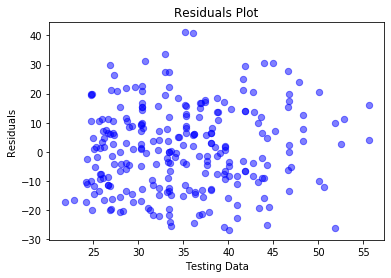

In [148]:
#residuals = y_test - preds
plt.scatter(lr1.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

#### Additional trial
Standardized data for feature cement was taken and regression was done. 
R^2 score remained same, RMSE was still high the model was still not very reliable to predict the independent variable 

### Taking multiple feature to perform regression
Since water and superplasticity had high corrleation, only one of them was considered at one time when doing analysis
**2 set of features were taken:** 
#1 cement, superplasticizer, age
#2 cement, water, age

For the first multivariate regression, the intercept and coefficents are

In [149]:
lr21.coef_

array([0.06883552, 1.11164956, 0.09789979])

In [150]:
lr21.intercept_

5.097652443799859

#### Regression equation is

**Y= 5.09765 + 0.06883552*X1 + 1.11164956*X2 + 0.09789979*X3**

where X1 = cement X2 = superplasticizer and X3 = age

#### Values of post regression test parameters 

In [151]:
print ("In multi-variate analysis \n\tMAE  was =  \t",MAE21, 
       "\n\tRoot Mean Squared Error (RMSE) was = \t",rmse21, 
       "\n\tR^2 was =\t",r2_score21)

In multi-variate analysis 
	MAE  was =  	 8.916875754948014 
	Root Mean Squared Error (RMSE) was = 	 14.233550592184192 
	R^2 was =	 0.5355153222613767


In [152]:
#The error was randomly distributed, please see below and the prediction vs actual grpah looked something like this 

Text(0, 0.5, 'Predictions')

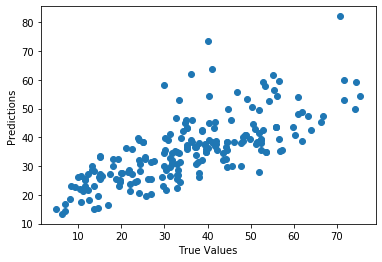

In [153]:
plt.scatter(y_test21, preds21)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

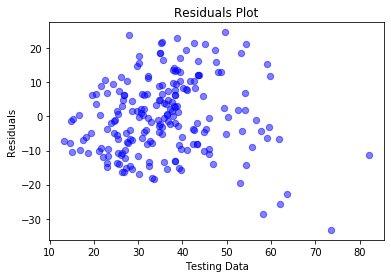

In [154]:
## Plot of the residuals
plt.scatter(preds21, residuals21, c='b', s=40, alpha=0.5) 
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

Result of the second attempt of multivariate regression analysis gave slightly lesser R^2 values and higher RMSE values, hence  not stating them in conclusion. The calculations can be seen above.

**Comaprison between the single feature regression and multi variable regression:** The single value regression and multi variable regression both didnot had high R^2 value and low RMSE.
However of the 2, the multi variate regression model explain more variation i.e. higher R^2 value, has lower MAE and is more reliable for prediction  